In [23]:
import os
import pandas as pd
import numpy as np

#Load expression matrices and join
# load all table files
path_to_files = '/home/mar/Documents/TFM/GitHub/HB_PublicData/1-Obtaining-DEGs-for-HB/DEGs_HB/Study_Variability/output/'
lst_expmat = []
for filen in [x for x in os.listdir(path_to_files) if '.csv' in x]:
    lst_expmat.append(pd.read_csv(path_to_files+filen, delimiter= ",").set_index(['genes']))

data = pd.concat(lst_expmat, axis=1, join='inner')
data = data.reset_index()
lfc = data[['log2FoldChange']]
lfc.columns = ['A','B','C','D','E']

In [24]:
lfc_melt = pd.melt(lfc.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D','E'])
# replace column names
lfc_melt.columns = ['index', 'studies', 'value']

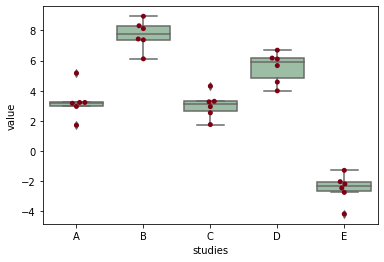

In [25]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='studies', y='value', data=lfc_melt, color='#99c2a2')
ax = sns.swarmplot(x="studies", y="value", data=lfc_melt, color='#7d0013')
plt.show()

In [26]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(lfc['A'], lfc['B'], lfc['C'], lfc['D'], lfc['E'])
print(fvalue, pvalue)

88.27099355365647 2.2766280272044683e-14


In [29]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=lfc_melt, res_var='value', anova_model='value ~ C(studies)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(studies),4.0,347.221753,86.805438,88.270994,2.276628e-14
Residual,25.0,24.584927,0.983397,NaN,NaN
